In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [7]:
movie = pd.read_csv("https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/datasets/movie.csv")

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


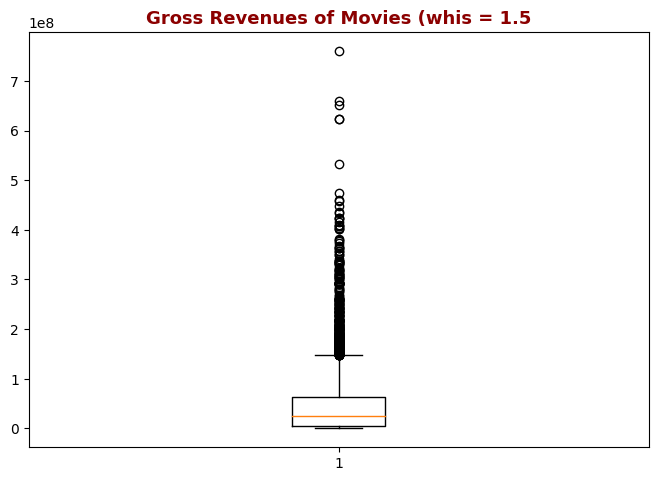

In [8]:
title_font = {'family':'arial', 'color': 'darkred', 'weight': 'bold', 'size':13}
axis_font = {'family':'arial', 'color': 'darkgreen', 'weight': 'bold', 'size':10}

plt.boxplot(movie.gross.dropna())
plt.title('Gross Revenues of Movies (whis = 1.5', fontdict=title_font)
plt.show()

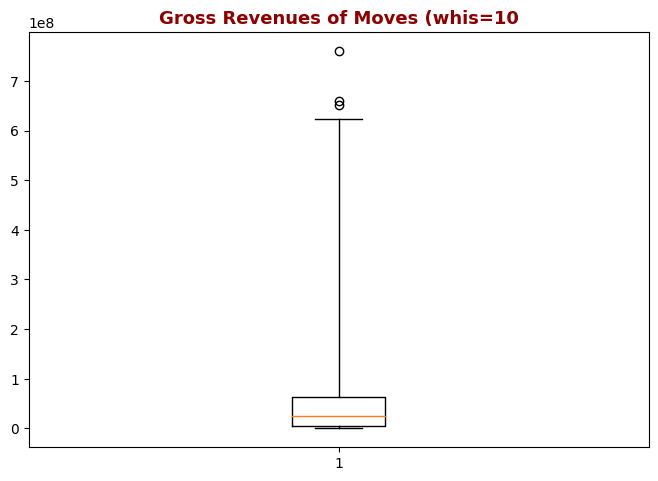

In [9]:
plt.boxplot(movie.gross.dropna(), whis = 10)
plt.title('Gross Revenues of Moves (whis=10', fontdict=title_font)
plt.show()

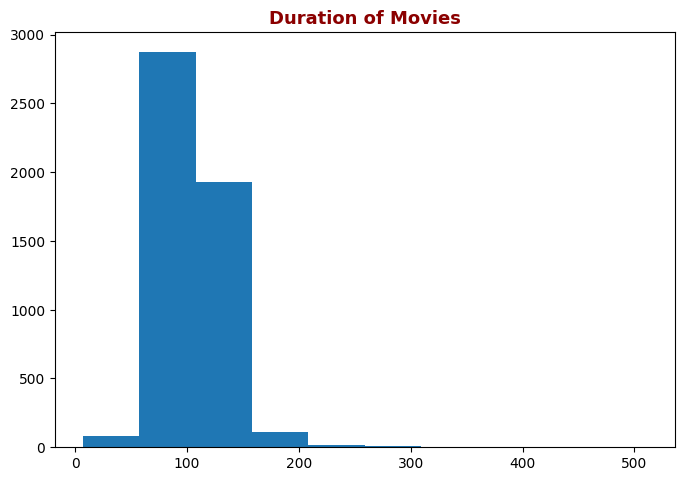

In [10]:
plt.hist(movie.duration)
plt.title('Duration of Movies', fontdict=title_font)
plt.show()


In [11]:
from scipy.stats import zscore

z_scores = zscore(movie['duration'].dropna())
for threshold in range(1,5):
  print('Threshold value: {}'.format(threshold))
  print('Number of Outliers: {}'. format(len((np.where(z_scores > threshold)[0])))) # check for more outliers

Threshold value: 1
Number of Outliers: 535
Threshold value: 2
Number of Outliers: 149
Threshold value: 3
Number of Outliers: 64
Threshold value: 4
Number of Outliers: 29


In [12]:
q75, q25 = np.percentile(movie['duration'].dropna(), [75, 25])
IQR = q75 - q25

In [13]:
threshold_values = []
for threshold_value in np.arange(1,5,0.5):
  min_value = q25 - (IQR*threshold_value)
  max_value = q75 + (IQR*threshold_value)
  outlier_value_number = len((np.where((movie['duration'].dropna() > max_value)| (movie['duration'].dropna() < min_value))[0]))
  threshold_values.append({'threshold_value':threshold_value, 'outlier_value_number':outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,408
1,1.5,241
2,2.0,157
3,2.5,100
4,3.0,49
5,3.5,31
6,4.0,23
7,4.5,17


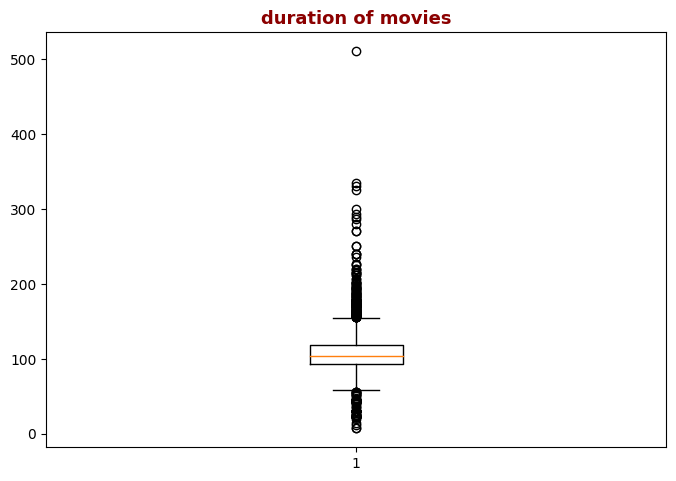

In [14]:
plt.boxplot(movie['duration'].dropna())
plt.title('duration of movies', fontdict=title_font)
plt.show()

In [15]:
from scipy.stats.mstats import winsorize
winsorizing = winsorize(np.array(movie.duration.dropna()), (0.10, 0.10))
winsorizing

masked_array(data=[134., 134., 134., ...,  86., 100.,  90.],
             mask=False,
       fill_value=1e+20)

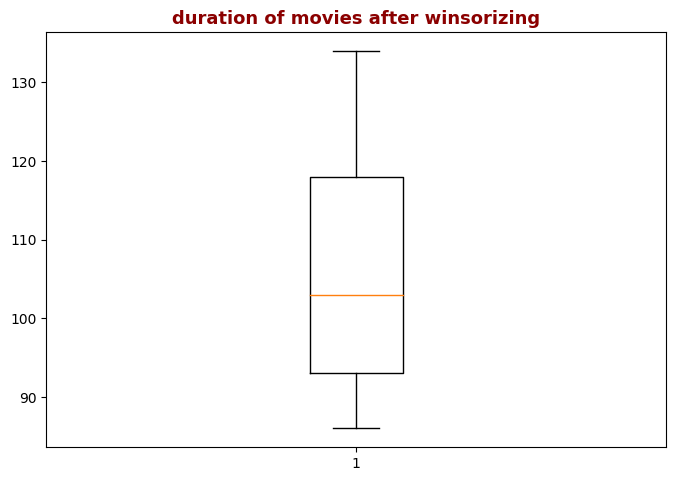

In [16]:
plt.boxplot(winsorizing)
plt.title('duration of movies after winsorizing', fontdict=title_font)
plt.show()

In [17]:
np.percentile(movie.duration.dropna(), [10, 90])

array([ 86., 134.])

In [18]:
winsorizing_gross = winsorize(np.array(movie.gross.dropna()), (0.10, 0.10))
winsorizing_gross

masked_array(data=[1.25069696e+08, 1.25069696e+08, 1.25069696e+08, ...,
                   3.81225000e+05, 3.81225000e+05, 3.81225000e+05],
             mask=False,
       fill_value=1e+20)

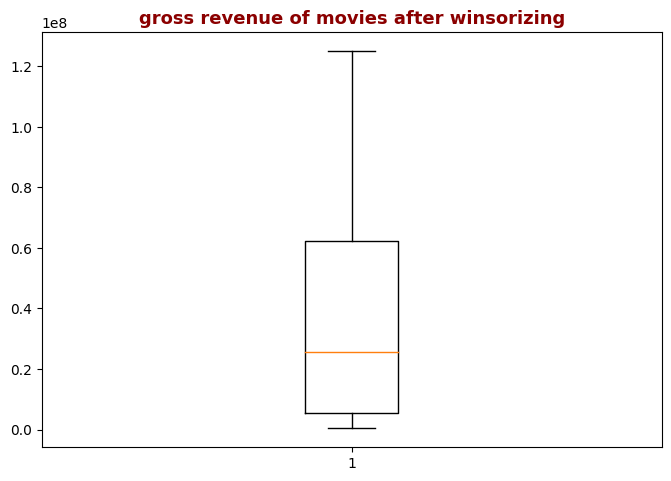

In [19]:
plt.boxplot(winsorizing_gross)
plt.title('gross revenue of movies after winsorizing', fontdict= title_font)
plt.show()

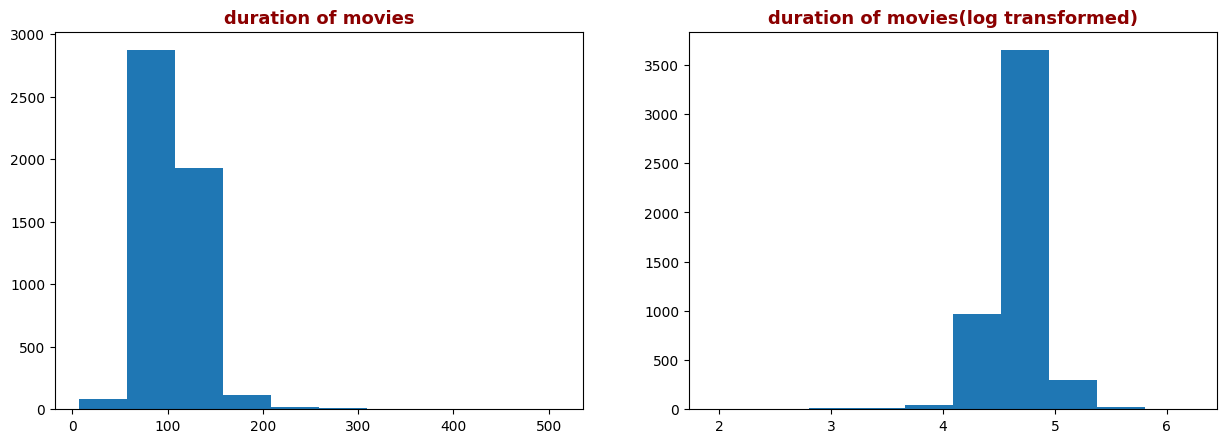

In [20]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.hist(movie['duration'].dropna())
plt.title('duration of movies', fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(np.log(movie['duration'].dropna()))
plt.title('duration of movies(log transformed)', fontdict=title_font)
plt.show()

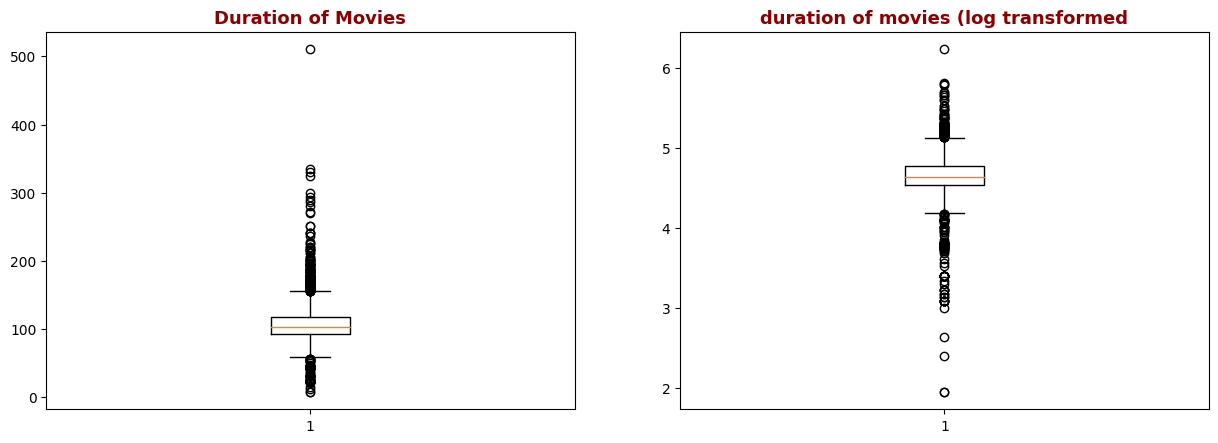

In [21]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.boxplot(movie['duration'].dropna())
plt.title('Duration of Movies', fontdict=title_font)

plt.subplot(1,2,2)
plt.boxplot(np.log(movie['duration'].dropna()))
plt.title('duration of movies (log transformed', fontdict=title_font)
plt.show()

In [22]:
q75_log, q25_log = np.percentile(np.log(movie['duration'].dropna()), [75, 25])
IQR_log = q75_log - q25_log

In [23]:
log_threshold_values = []

for threshold_value in np.arange(1,5,0.5):
  min_value_log = q25_log - (IQR_log*threshold_value)
  max_value_log = q75_log + (IQR_log*threshold_value)
  min_value = q25 - (IQR*threshold_value)
  max_value = q75 + (IQR*threshold_value)

  outlier_value_number_log = len((np.where((np.log(movie['duration'].dropna()) > max_value_log) | (np.log(movie['duration'].dropna()) < min_value_log))[0]))
  outlier_value_number = len((np.where((movie['duration'].dropna() > max_value) | (movie['duration'].dropna() < min_value))[0]))
  log_threshold_values.append({'threshold_value': threshold_value, 'outlier_value_number': outlier_value_number, 'outlier_value_number_log': outlier_value_number_log})

pd.DataFrame(log_threshold_values)
  

,threshold_value,outlier_value_number,outlier_value_number_log
0,1.0,408,358
1,1.5,241,227
2,2.0,157,130
3,2.5,100,98
4,3.0,49,81
5,3.5,31,47
6,4.0,23,40
7,4.5,17,35


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


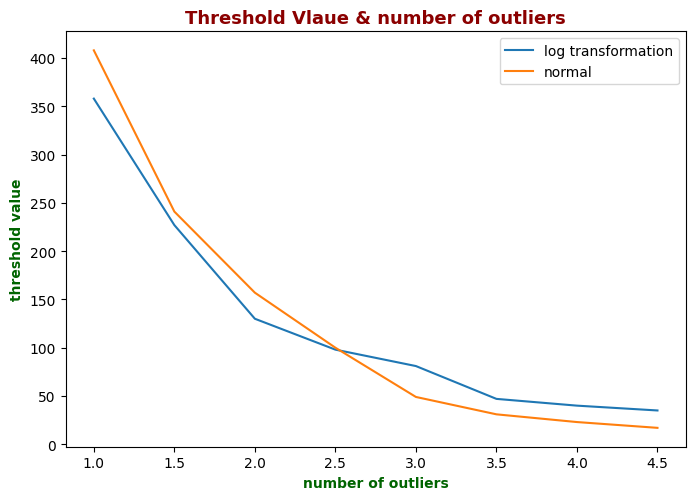

In [24]:
pd.DataFrame(log_threshold_values).plot(x='threshold_value', y=['outlier_value_number_log', 'outlier_value_number'])
plt.title('Threshold Vlaue & number of outliers', fontdict = title_font)
plt.ylabel('threshold value', fontdict = axis_font)
plt.xlabel('number of outliers', fontdict=axis_font)
plt.legend(('log transformation', 'normal'))
plt.show()

In [25]:
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [26]:
movie = pd.read_csv("https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/datasets/movie.csv")
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [27]:
movie['winsorize_num_critic_for_reviews'] = winsorize(movie['num_critic_for_reviews'], (0,0.10))
movie['winsorize_duration'] = winsorize(movie['duration'], (0,0.10))
movie['winsorize_gross'] = winsorize(movie['gross'], (0, 0.10))

In [28]:
pd.options.display.float_format = '{:.3f}'.format
for i in range(0, len(movie.gross)):
  if pd.isnull(movie.gross[i]):
    movie.gross[i] = movie.gross[i-1]


In [29]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.000,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000,313.000,134.000,760505847.000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.000,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0,302.000,134.000,309404152.000
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.000,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000,313.000,134.000,200074175.000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.000,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000,313.000,134.000,448130642.000
4,NaN,Doug Walker,nan,nan,131.000,nan,Rob Walker,131.000,448130642.000,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.000,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,NaN,NaN,NaN,nan,nan,12.000,7.100,nan,0,313.000,134.000,nan


In [30]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross
count,4993.000,5028.000,4939.000,5020.000,5036.000,5043.000,5043.000,5043.000,5030.000,5022.000,4551.000,4935.000,5030.000,5043.000,4714.000,5043.000,5043.000,5043.000,4159.000
mean,140.194,107.201,686.509,645.010,6560.047,43055525.712,83668.161,9699.064,1.371,272.771,39752620.436,2002.471,1651.754,6.442,2.220,7525.965,131.854,104.956,48468407.527
std,121.602,25.197,2813.329,1665.042,15020.759,65555250.707,138485.257,18163.799,2.014,377.983,206114898.449,12.475,4042.439,1.125,1.385,19320.445,96.888,18.389,68452990.439
min,1.000,7.000,0.000,0.000,0.000,162.000,5.000,0.000,0.000,1.000,218.000,1916.000,0.000,1.600,1.180,0.000,1.000,7.000,162.000
25%,50.000,93.000,7.000,133.000,614.000,2419448.000,8593.500,1411.000,0.000,65.000,6000000.000,1999.000,281.000,5.800,1.850,0.000,50.000,93.000,5340987.500
50%,110.000,103.000,49.000,371.500,988.000,19179969.000,34359.000,3090.000,1.000,156.000,20000000.000,2005.000,595.000,6.600,2.350,166.000,111.000,103.000,25517500.000
75%,195.000,118.000,194.500,636.000,11000.000,54724272.000,96309.000,13756.500,2.000,326.000,45000000.000,2011.000,918.000,7.200,2.350,3000.000,198.000,118.000,62309437.500
max,813.000,511.000,23000.000,23000.000,640000.000,760505847.000,1689764.000,656730.000,43.000,5060.000,12215500000.000,2016.000,137000.000,9.500,16.000,349000.000,313.000,134.000,760505847.000


In [31]:
movie.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,Steve Coogan,based on novel,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [32]:
movie.to_csv('movie_winsorize.csv', encoding = 'utf8', index = False)


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


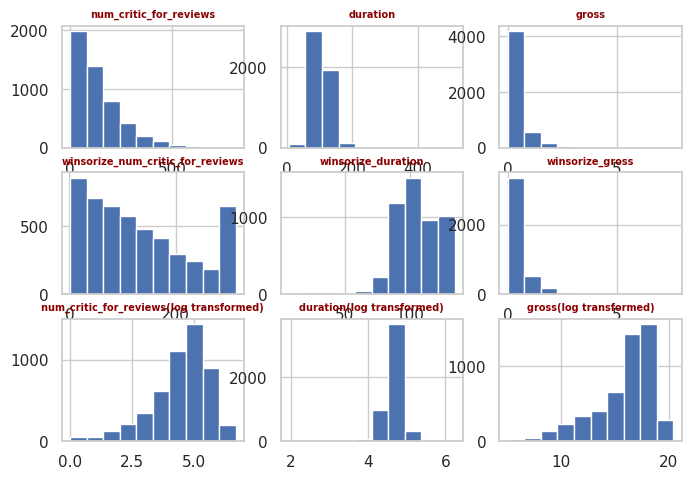

In [33]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 7 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size':7 }

variables = ['num_critic_for_reviews', 'duration', 'gross']
winsorize_variables = ['winsorize_num_critic_for_reviews', 'winsorize_duration', 'winsorize_gross']


for i in range(3):
  plt.subplot(3,3,i+1)
  plt.hist(movie[variables[i]])
  plt.title(variables[i], fontdict=title_font)

for i in range(3):
  plt.subplot(3,3, i +4)
  plt.hist(movie[winsorize_variables[i]])
  plt.title(winsorize_variables[i], fontdict=title_font)

for i in range(3):
  plt.subplot(3,3,i+7)
  plt.hist(np.log(movie[variables[i]]))
  plt.title(variables[i] + '(log transformed)', fontdict=title_font)

In [34]:
movie.content_rating.dropna(inplace=True)


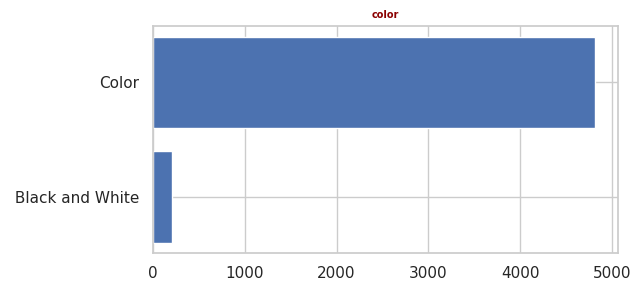

In [35]:
plt.figure(figsize=(6,3))
plt.barh(movie.groupby('color')['color'].count().index, movie.groupby('color')['color'].count())
plt.title('color', fontdict=title_font)
plt.show()

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

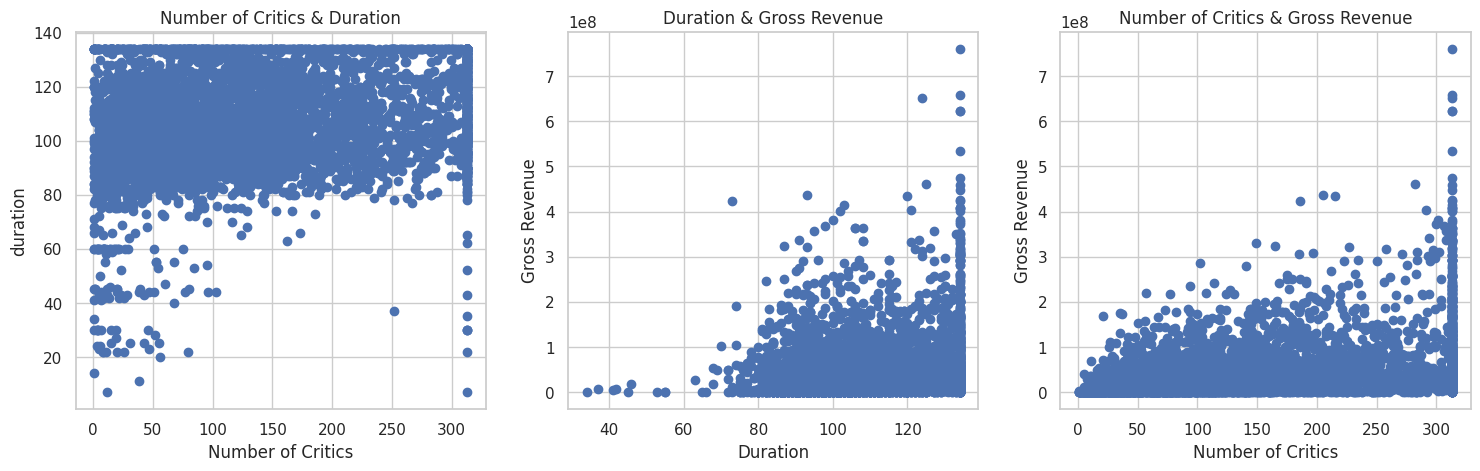

In [41]:
plt.figure(figsize=(18,5))
title_font = {'family':'arial', 'color': 'darkred', 'weight': 'bold', 'size':13}
axis_font = {'family':'arial', 'color': 'darkgreen', 'weight': 'bold', 'size':10}

plt.subplot(1,3,1)
plt.scatter(movie['winsorize_num_critic_for_reviews'], movie['winsorize_duration'])
plt.title('Number of Critics & Duration')
plt.xlabel('Number of Critics')
plt.ylabel('duration')

plt.subplot(1,3,2)
plt.scatter(movie['winsorize_duration'], movie['winsorize_gross'])
plt.title('Duration & Gross Revenue')
plt.xlabel('Duration')
plt.ylabel('Gross Revenue')

plt.subplot(1,3,3)

plt.scatter(movie['winsorize_num_critic_for_reviews'], movie['winsorize_gross'])
plt.title('Number of Critics & Gross Revenue')
plt.xlabel('Number of Critics')
plt.ylabel('Gross Revenue')

plt.show()




In [45]:
movie['winsorize_budget'] = winsorize(movie['budget'], (0, 0.10))

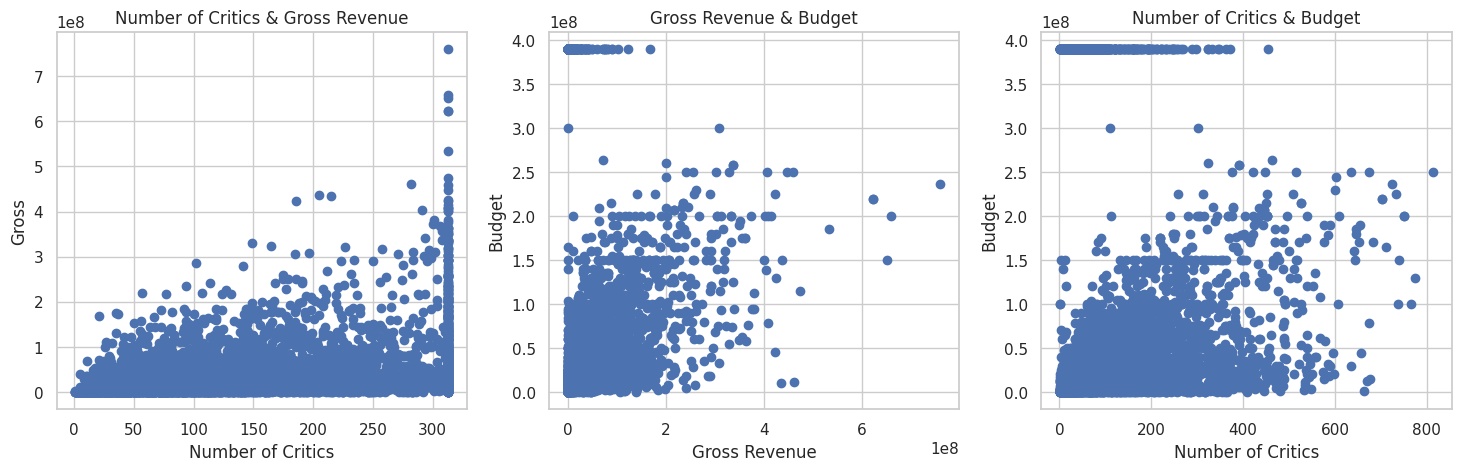

In [46]:
plt.figure(figsize=(18,5))
title_font = {'family':'arial', 'color': 'darkred', 'weight': 'bold', 'size':13}
axis_font = {'family':'arial', 'color': 'darkgreen', 'weight': 'bold', 'size':10}

plt.subplot(1,3,1)
plt.scatter(movie['winsorize_num_critic_for_reviews'], movie['winsorize_gross'])
plt.title('Number of Critics & Gross Revenue')
plt.xlabel('Number of Critics')
plt.ylabel('Gross')

plt.subplot(1,3,2)
plt.scatter(movie['winsorize_gross'], movie['winsorize_budget'])
plt.title('Gross Revenue & Budget')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget')

plt.subplot(1,3,3)

plt.scatter(movie['num_critic_for_reviews'], movie['winsorize_budget'])
plt.title('Number of Critics & Budget')
plt.xlabel('Number of Critics')
plt.ylabel('Budget')

plt.show()

In [47]:
movie.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross,winsorize_budget
num_critic_for_reviews,1.000,0.258,0.181,0.272,0.190,0.486,0.625,0.263,-0.034,0.609,0.120,0.276,0.282,0.305,-0.050,0.683,0.946,0.306,0.481,-0.008
duration,0.258,1.000,0.173,0.124,0.088,0.228,0.315,0.123,0.013,0.328,0.074,-0.135,0.132,0.262,-0.090,0.197,0.223,0.875,0.250,-0.064
director_facebook_likes,0.181,0.173,1.000,0.120,0.091,0.141,0.297,0.120,-0.041,0.222,0.021,-0.064,0.120,0.171,0.002,0.162,0.146,0.183,0.145,-0.010
actor_3_facebook_likes,0.272,0.124,0.120,1.000,0.250,0.310,0.287,0.474,0.099,0.230,0.047,0.096,0.560,0.053,-0.003,0.279,0.219,0.136,0.308,0.033
actor_1_facebook_likes,0.190,0.088,0.091,0.250,1.000,0.152,0.193,0.952,0.072,0.145,0.023,0.087,0.390,0.076,-0.020,0.135,0.180,0.112,0.154,-0.020
gross,0.486,0.228,0.141,0.310,0.152,1.000,0.624,0.241,-0.024,0.558,0.111,0.050,0.269,0.182,-0.001,0.376,0.416,0.232,1.000,0.102
num_voted_users,0.625,0.315,0.297,0.287,0.193,0.624,1.000,0.266,-0.027,0.798,0.080,0.007,0.271,0.411,-0.015,0.538,0.551,0.310,0.637,0.002
cast_total_facebook_likes,0.263,0.123,0.120,0.474,0.952,0.241,0.266,1.000,0.091,0.207,0.037,0.110,0.628,0.086,-0.018,0.210,0.236,0.148,0.247,-0.008
facenumber_in_poster,-0.034,0.013,-0.041,0.099,0.072,-0.024,-0.027,0.091,1.000,-0.069,-0.020,0.062,0.071,-0.063,0.014,0.009,-0.038,0.025,-0.028,-0.002
num_user_for_reviews,0.609,0.328,0.222,0.230,0.145,0.558,0.798,0.207,-0.069,1.000,0.084,-0.003,0.219,0.292,-0.025,0.401,0.566,0.319,0.560,-0.004


In [48]:
movie_mat_youtube = movie.corr()
display(movie_mat_youtube)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross,winsorize_budget
num_critic_for_reviews,1.000,0.258,0.181,0.272,0.190,0.486,0.625,0.263,-0.034,0.609,0.120,0.276,0.282,0.305,-0.050,0.683,0.946,0.306,0.481,-0.008
duration,0.258,1.000,0.173,0.124,0.088,0.228,0.315,0.123,0.013,0.328,0.074,-0.135,0.132,0.262,-0.090,0.197,0.223,0.875,0.250,-0.064
director_facebook_likes,0.181,0.173,1.000,0.120,0.091,0.141,0.297,0.120,-0.041,0.222,0.021,-0.064,0.120,0.171,0.002,0.162,0.146,0.183,0.145,-0.010
actor_3_facebook_likes,0.272,0.124,0.120,1.000,0.250,0.310,0.287,0.474,0.099,0.230,0.047,0.096,0.560,0.053,-0.003,0.279,0.219,0.136,0.308,0.033
actor_1_facebook_likes,0.190,0.088,0.091,0.250,1.000,0.152,0.193,0.952,0.072,0.145,0.023,0.087,0.390,0.076,-0.020,0.135,0.180,0.112,0.154,-0.020
gross,0.486,0.228,0.141,0.310,0.152,1.000,0.624,0.241,-0.024,0.558,0.111,0.050,0.269,0.182,-0.001,0.376,0.416,0.232,1.000,0.102
num_voted_users,0.625,0.315,0.297,0.287,0.193,0.624,1.000,0.266,-0.027,0.798,0.080,0.007,0.271,0.411,-0.015,0.538,0.551,0.310,0.637,0.002
cast_total_facebook_likes,0.263,0.123,0.120,0.474,0.952,0.241,0.266,1.000,0.091,0.207,0.037,0.110,0.628,0.086,-0.018,0.210,0.236,0.148,0.247,-0.008
facenumber_in_poster,-0.034,0.013,-0.041,0.099,0.072,-0.024,-0.027,0.091,1.000,-0.069,-0.020,0.062,0.071,-0.063,0.014,0.009,-0.038,0.025,-0.028,-0.002
num_user_for_reviews,0.609,0.328,0.222,0.230,0.145,0.558,0.798,0.207,-0.069,1.000,0.084,-0.003,0.219,0.292,-0.025,0.401,0.566,0.319,0.560,-0.004


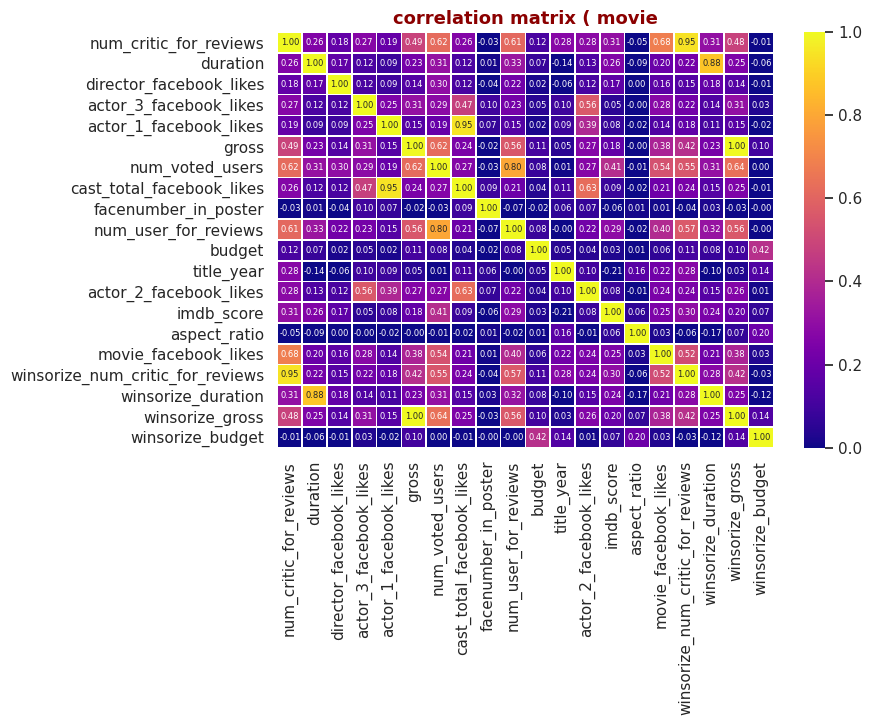

In [52]:
sns.heatmap(movie_mat_youtube, annot = True, fmt = '.2f', annot_kws={'size': 6}, linewidths=.5,vmin = 0 , vmax = 1, cmap = 'plasma')
plt.title("correlation matrix ( movie", fontdict=title_font)
plt.show()

In [53]:
movie.groupby('color'). mean().T # categories based on whether the movie is balckwhite or color

color,Black and White,Color
num_critic_for_reviews,129.005,141.048
duration,112.254,107.043
director_facebook_likes,1251.942,663.919
actor_3_facebook_likes,392.354,657.094
actor_1_facebook_likes,3925.986,6640.256
gross,25581312.249,43802819.073
num_voted_users,95579.679,83405.574
cast_total_facebook_likes,5903.354,9836.873
facenumber_in_poster,1.411,1.370
num_user_for_reviews,353.670,270.034


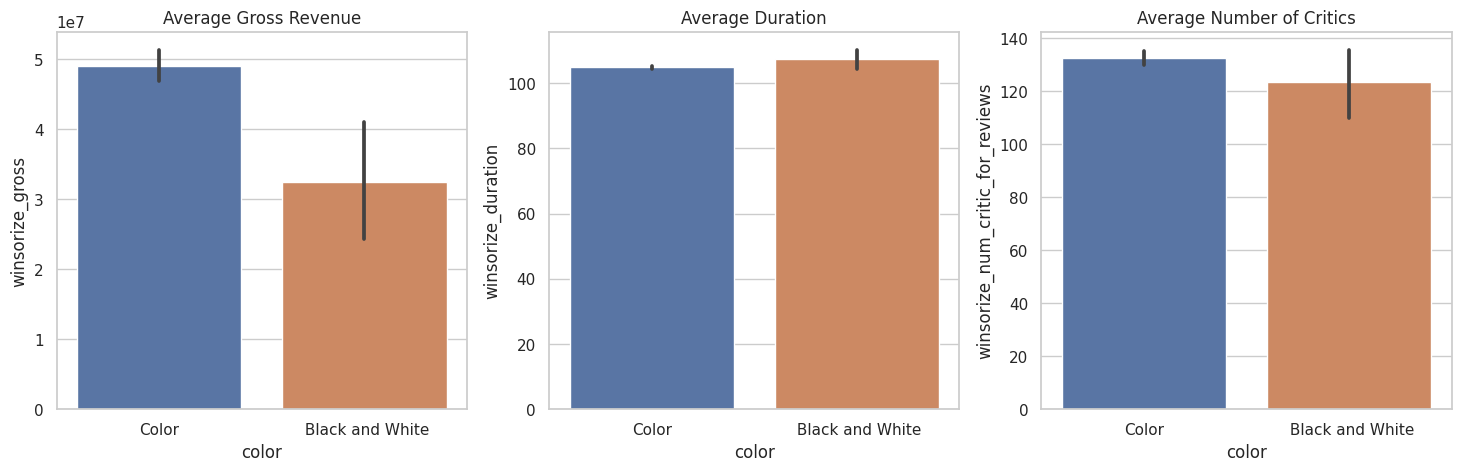

In [55]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(movie['color'], movie['winsorize_gross'])
plt.title('Average Gross Revenue')

plt.subplot(1,3,2)
sns.barplot(movie['color'], movie['winsorize_duration'])
plt.title('Average Duration')

plt.subplot(1,3,3)
sns.barplot(movie['color'], movie['winsorize_num_critic_for_reviews'])
plt.title('Average Number of Critics')

plt.show()